# Support Vector Machine

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from skimage.feature import hog
from skimage import data, exposure
from sklearn.metrics import r2_score
import joblib
import cv2
import os
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Define the path to the image directory
path = '/content/drive/My Drive/Main_Dataset'

In [6]:
# Reading image data
images = []
labels = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        class_label = folder # Set the class label as the folder name
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (64, 64))
                fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
                images.append(fd)
                labels.append(class_label)


In [7]:
# Converting to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [8]:
# Splitting into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [9]:
# Scaling the data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [10]:
# Building SVM model
clf = SVC(kernel='rbf', C=10, gamma=0.1)


In [ ]:
# Training the model
clf.fit(X1_train, y1_train)

In [12]:
#pip install joblib

In [ ]:
#import joblib

# Save the trained model
joblib.dump(clf, 'model.pkl')

In [14]:
#class_names = ['benign', 'malignant']

# Load the model
clf = ...

In [15]:
# Set the class names
class_names = ['benign', 'malignant']

In [16]:
# Load the trained model
clf = joblib.load('/content/drive/MyDrive/Main_Dataset/model.pkl')

In [17]:
# Converting to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [18]:
# Scaling the data
scaler = StandardScaler()
images = scaler.fit_transform(images)

In [19]:
# Predicting on test set
y1_pred = clf.predict(images)

In [20]:
# Generating confusion matrix
cm = confusion_matrix(labels, y1_pred, labels=class_names)

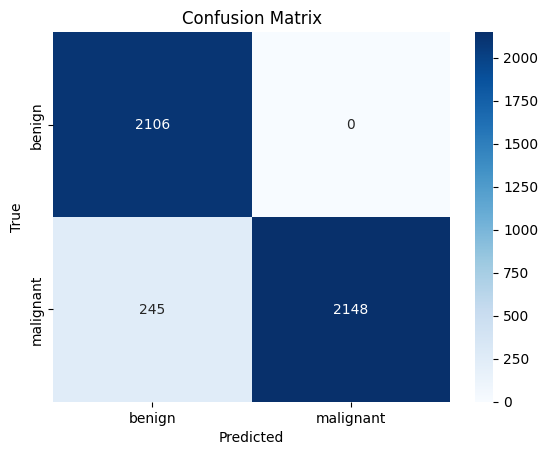

In [21]:
# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Predicting on test set
y1_pred = clf.predict(X1_test)

In [23]:
# Evaluating the model
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

[[205   0]
 [ 29 216]]
              precision    recall  f1-score   support

      benign       0.88      1.00      0.93       205
   malignant       1.00      0.88      0.94       245

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



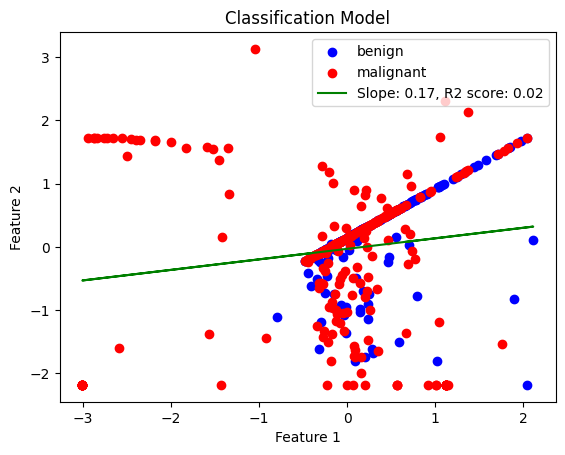

In [24]:
# Define the colors for each class
colors = {'benign': 'blue', 'malignant': 'red'}


# Plot the data
for i, class_name in enumerate(class_names):
    plt.scatter(X1_test[y1_test==class_name, 0], X1_test[y1_test==class_name, 1], color=colors[class_name], label=class_name)

# Plot the line of best fit
m, b = np.polyfit(X1_test[:,0], X1_test[:,1], 1)
plt.plot(X1_test[:,0], m * X1_test[:,0] + b, color='green', label=f'Slope: {m:.2f}, R2 score: {r2_score(X1_test[:,1], m * X1_test[:,0] + b):.2f}')

plt.title('Classification Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [25]:
#!pip install opencv-python-headless
#!pip install pyngrok

# Random Forest

In [26]:
# Reading image data
images = []
labels = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        class_label = folder # Set the class label as the folder name
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (64, 64))
                fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
                images.append(fd)
                labels.append(class_label)

In [27]:
# Converting to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [28]:
# Splitting into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [29]:
# Scaling the data
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [30]:
# Building Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
# Training the model
clf.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Save the trained model
joblib.dump(clf, 'model_2.pkl')

In [33]:
# Load the trained model
clf = joblib.load('/content/drive/MyDrive/Main_Dataset/model_2.pkl')

In [34]:
# Predicting on test set
y2_pred = clf.predict(X2_test)

In [35]:
# Evaluating the model
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[204   1]
 [  9 236]]
              precision    recall  f1-score   support

      benign       0.96      1.00      0.98       205
   malignant       1.00      0.96      0.98       245

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



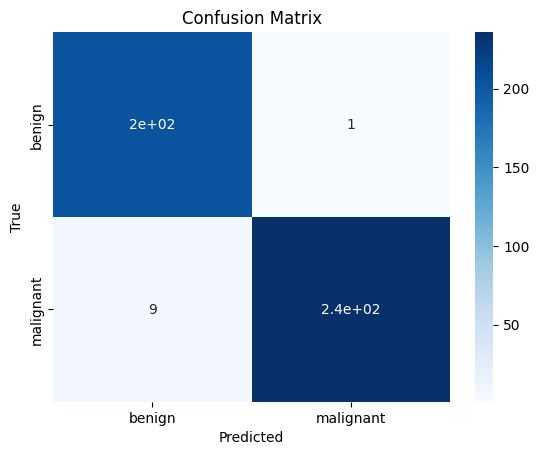

In [36]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y2_test, y2_pred), annot=True, cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

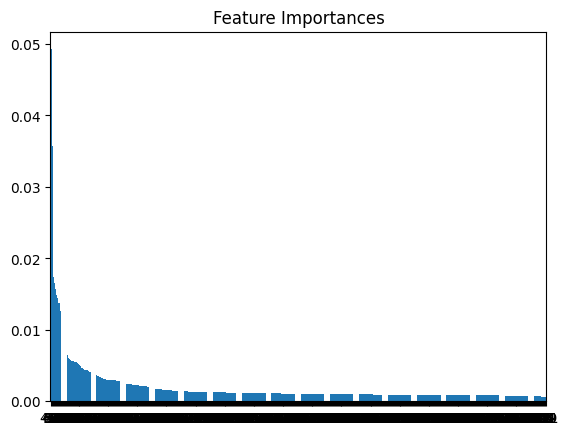

In [37]:
# Plot feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X2_train.shape[1]), importances[indices])
plt.xticks(range(X2_train.shape[1]), indices)
plt.xlim([-1, X2_train.shape[1]])
plt.show()


# K-Nearest Neighbors

In [38]:
# Reading image data
images = []
labels = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        class_label = folder # Set the class label as the folder name
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (64, 64))
                fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
                images.append(fd)
                labels.append(class_label)

In [39]:
# Converting to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [40]:
# Splitting into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [41]:
# Scaling the data
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [42]:
# Building KNN model
clf = KNeighborsClassifier(n_neighbors=5)  # KNN classifier with k=5 neighbors

In [44]:
# Training the model
clf.fit(X3_train, y3_train)

KNeighborsClassifier()

In [45]:
# Predicting on test set
y3_pred = clf.predict(X3_test)

In [46]:
# Evaluating the model
cm = confusion_matrix(y3_test, y3_pred)
cr = classification_report(y3_test, y3_pred)

print(cm)
print(cr)

[[187  18]
 [ 98 147]]
              precision    recall  f1-score   support

      benign       0.66      0.91      0.76       205
   malignant       0.89      0.60      0.72       245

    accuracy                           0.74       450
   macro avg       0.77      0.76      0.74       450
weighted avg       0.78      0.74      0.74       450



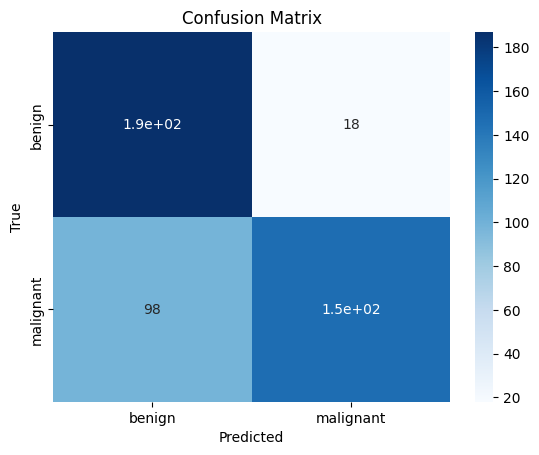

In [47]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y3_test, y3_pred), annot=True, cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

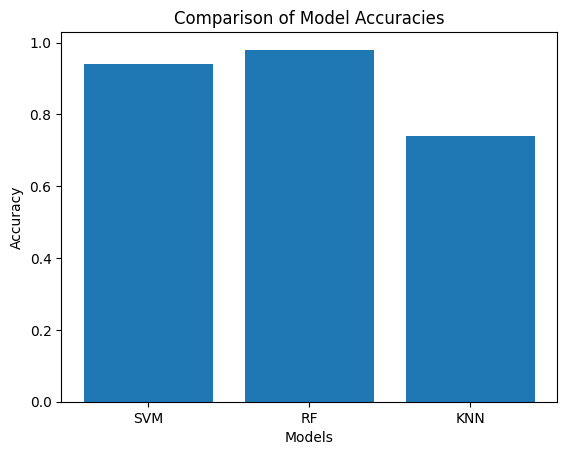

In [51]:
import matplotlib.pyplot as plt

# Define the models and their corresponding accuracies
models = ['SVM', 'RF', 'KNN']
accuracies = [0.94, 0.98, 0.74]

# Plot the vertical bar chart
plt.bar(models, accuracies)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the chart
plt.show()


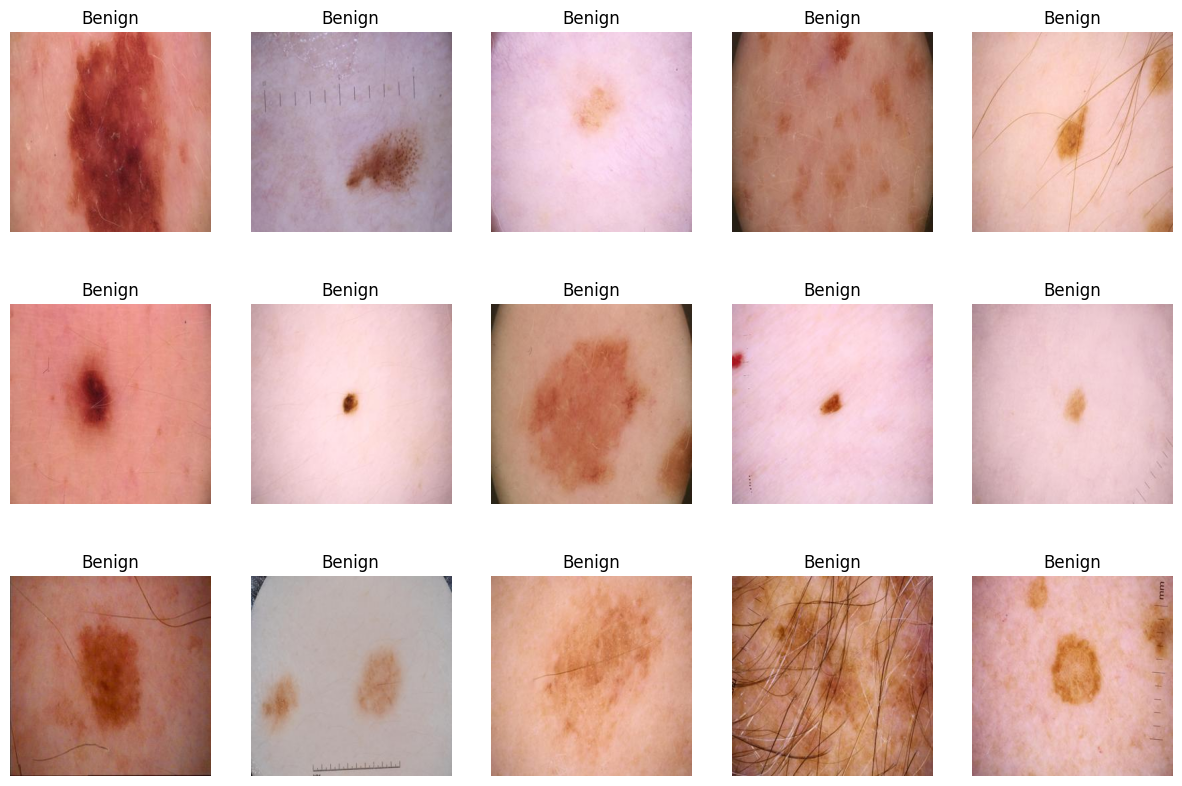

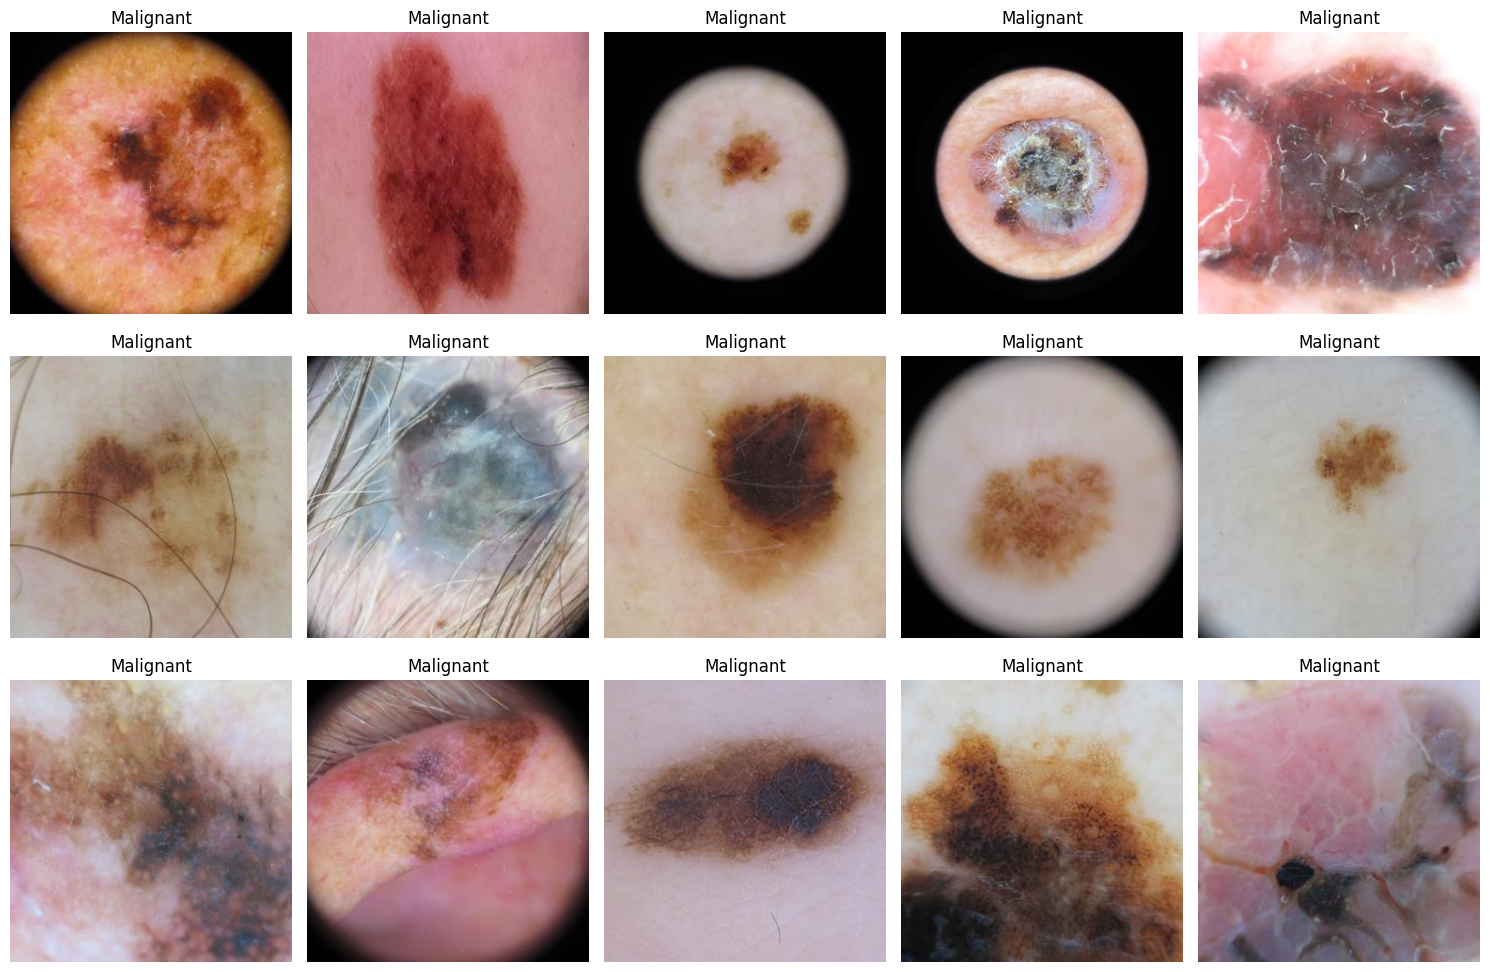

In [52]:
path = "/content/drive/MyDrive/Main_Dataset"
benign_folder = os.path.join(path, "benign")
malignant_folder = os.path.join(path, "malignant")

benign_images = []
malignant_images = []

# Load and process benign images
for filename in os.listdir(benign_folder)[:15]:
    if filename.endswith('.jpg'):
        image_path = os.path.join(benign_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        benign_images.append(image)

# Load and process malignant images
for filename in os.listdir(malignant_folder)[:15]:
    if filename.endswith('.jpg'):
        image_path = os.path.join(malignant_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        malignant_images.append(image)

# Display the first 15 benign images
plt.figure(figsize=(15, 10))
for i, image in enumerate(benign_images[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(image)
    plt.title("Benign")
    plt.axis('off')

# Display the first 15 malignant images
plt.figure(figsize=(15, 10))
for i, image in enumerate(malignant_images[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(image)
    plt.title("Malignant")
    plt.axis('off')

plt.tight_layout()
plt.show()